<a href="https://colab.research.google.com/github/f8sle/report/blob/main/mid_term_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#1-1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


x = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/boston_house_data.xlsx', usecols=[13]).values
y = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/boston_house_target.xlsx', usecols=[1]).values

x = x.reshape(-1, 1)
y = y.reshape(-1, 1)


scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)


plt.figure(figsize=(6, 4))
plt.title('Training Data', fontsize=16)
plt.xlabel('X (original)', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.plot(x, y, 'bo', markersize=3, label="data")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


w1 = 0
w0 = 0
lrate = 0.001
epochs = 10000
n = float(len(x_scaled))


for i in range(epochs):
    y_pred = w1 * x_scaled + w0
    dw1 = (1/n) * np.sum(x_scaled * (y_pred - y))
    dw0 = (1/n) * np.sum(y_pred - y)
    w1 = w1 - lrate * dw1
    w0 = w0 - lrate * dw0


    if i % 1000 == 0:
        mse = np.mean((y_pred - y)**2)




plt.figure(figsize=(6, 4))
plt.title('Linear Regression (Gradient Descent)', fontsize=14)
plt.xlabel('X (scaled)', fontsize=12)
plt.ylabel('Y (target)', fontsize=12)
plt.scatter(x_scaled, y, color='blue', s=10, label="Training Data")


xp = np.linspace(np.min(x_scaled), np.max(x_scaled), 100).reshape(-1, 1)
y_pred_gd = w1 * xp + w0
plt.plot(xp, y_pred_gd, color='red', linewidth=2, label="Prediction (GD)")
plt.legend()
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()


X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred_test = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)


plt.figure(figsize=(6, 4))
plt.title('Linear Regression (Scikit-learn)', fontsize=14)
plt.xlabel('X (scaled)', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.plot(X_train, y_train, 'bo', markersize=3, label="Training data")
plt.plot(X_test, y_test, 'go', markersize=3, label="Test data")
xp = np.linspace(np.min(x_scaled), np.max(x_scaled), 100).reshape(-1, 1)
y_pred_sk = model.predict(xp)
plt.plot(xp, y_pred_sk, 'r', linewidth=2, label="Linear model")
plt.legend()
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()


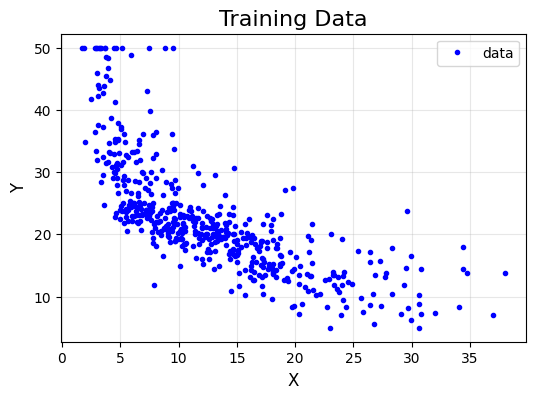


=== 2차 다항회귀(gradient) ===
평가도: 0.6406


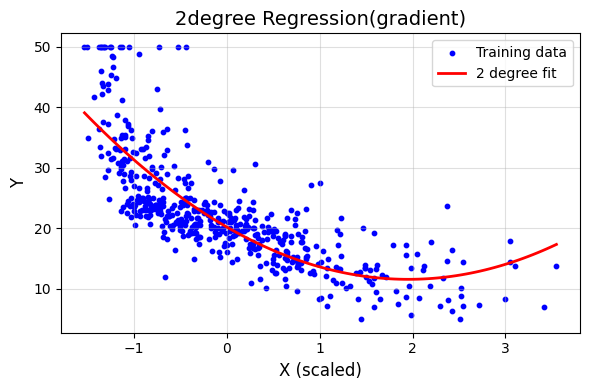


=== 3차 다항회귀(gradient) ===
평가도: 0.6550


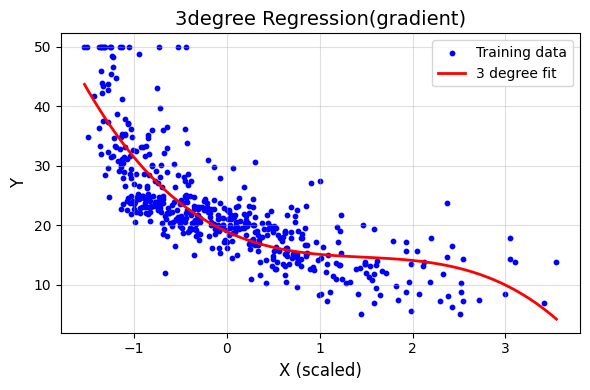


=== 4차 다항회귀(gradient) ===
평가도: 0.6699


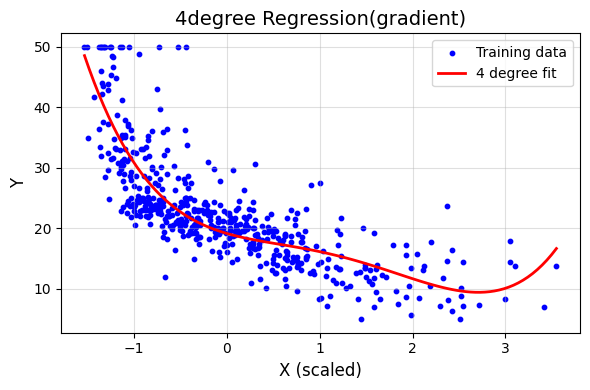


=== 2차 다항 회귀 (Scikit-learn) ===
테스트 데이터 평가: 0.5762


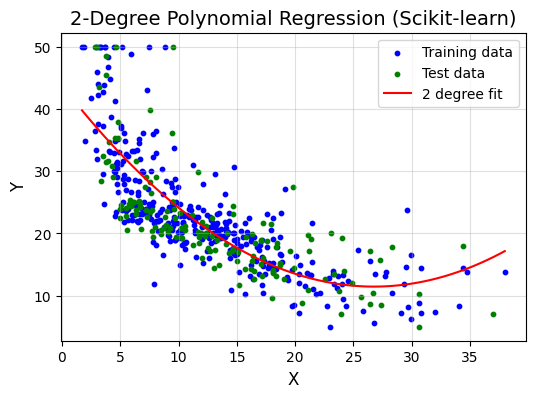


=== 3차 다항 회귀 (Scikit-learn) ===
테스트 데이터 평가: 0.6058


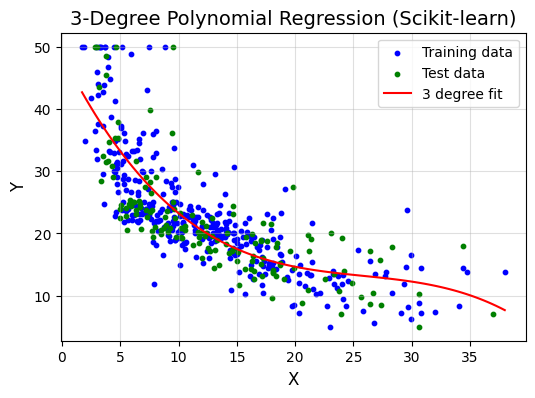


=== 4차 다항 회귀 (Scikit-learn) ===
테스트 데이터 평가: 0.6204


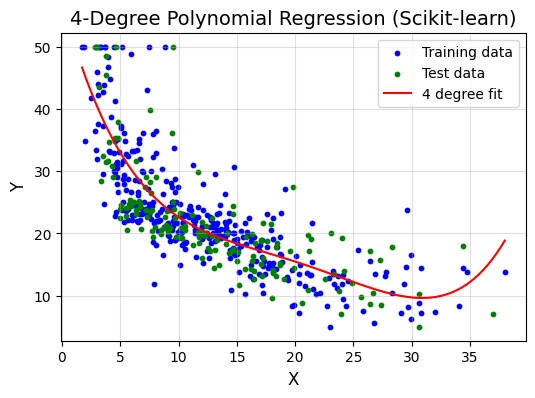

In [98]:
#1-2,3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score


x = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/boston_house_data.xlsx', usecols=[13]).values
y = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/boston_house_target.xlsx', usecols=[1]).values


x = x.reshape(-1, 1)
y = y.reshape(-1, 1)


plt.figure(figsize=(6, 4))
plt.title('Training Data', fontsize=16)
plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.plot(x, y, 'bo', markersize=3, label="data")
plt.legend()
plt.grid(alpha=0.3)
plt.show()



lrate = 0.001
epochs = 10000
n = len(x_scaled)

for degree in range(2, 5):
    print(f"\n=== {degree}차 다항회귀(gradient) ===")

    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(x_scaled)


    weights = np.zeros((degree + 1, 1))


    for _ in range(epochs):
        y_pred = X_poly.dot(weights)
        error = y_pred - y
        gradients = (1/n) * X_poly.T.dot(error)
        weights -= lrate * gradients

    y_pred_train = X_poly.dot(weights)
    mse = mean_squared_error(y, y_pred_train)
    r2 = r2_score(y, y_pred_train)
    print(f"평가도: {r2:.4f}")


    plt.figure(figsize=(6, 4))
    plt.title(f'{degree}degree Regression(gradient)', fontsize=14)
    plt.xlabel('X (scaled)', fontsize=12)
    plt.ylabel('Y', fontsize=12)
    plt.scatter(x_scaled, y, color='blue', s=10, label='Training data')

    xp = np.linspace(np.min(x_scaled), np.max(x_scaled), 100).reshape(-1, 1)
    xp_poly = poly.transform(xp)
    y_pred_curve = xp_poly.dot(weights)
    plt.plot(xp, y_pred_curve, 'r-', linewidth=2, label=f'{degree} degree fit')
    plt.legend()
    plt.grid(alpha=0.4)
    plt.tight_layout()
    plt.show()




X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


for degree in range(2, 5):
    print(f"\n=== {degree}차 다항 회귀 (Scikit-learn) ===")

    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    y_pred_test = model.predict(X_test_poly)

    mse_test = mean_squared_error(y_test, y_pred_test)
    r2_test = r2_score(y_test, y_pred_test)

    coefs = model.coef_.flatten()
    intercept = model.intercept_[0]


    print(f"테스트 데이터 평가: {r2_test:.4f}")


    plt.figure(figsize=(6, 4))
    plt.title(f'{degree}-Degree Polynomial Regression (Scikit-learn)', fontsize=14)
    plt.xlabel('X', fontsize=12)
    plt.ylabel('Y', fontsize=12)
    plt.scatter(X_train, y_train, color='blue', s=10, label="Training data")
    plt.scatter(X_test, y_test, color='green', s=10, label="Test data")

    xp = np.linspace(np.min(x), np.max(x), 100).reshape(-1, 1)
    xp_poly = poly.transform(xp)
    y_pred_sk = model.predict(xp_poly)
    plt.plot(xp, y_pred_sk, 'r-', label=f'{degree} degree fit')
    plt.legend()
    plt.grid(alpha=0.4)
    plt.show()

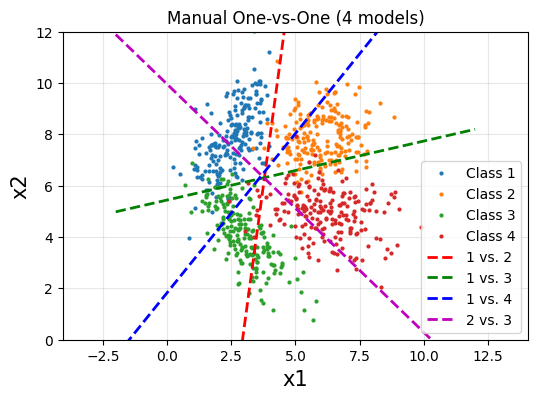

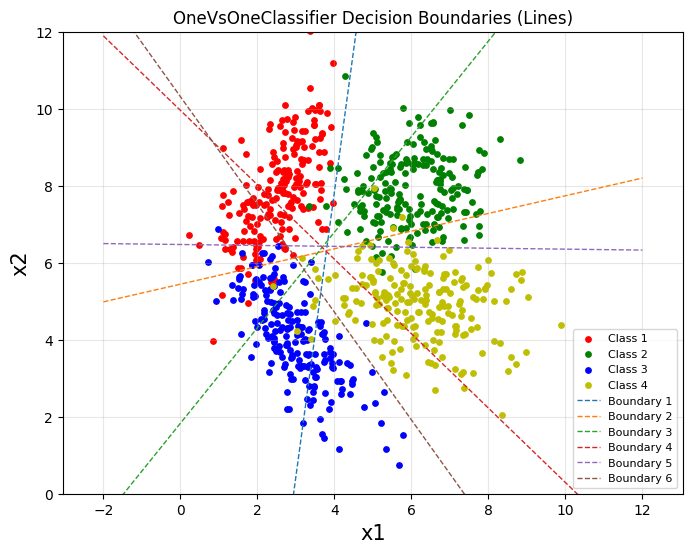

In [90]:
#2-1
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
import matplotlib.pyplot as plt


data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/multivariate_data.csv')

X1 = data[['C1_X1', 'C1_X2']].values
X2 = data[['C2_X1', 'C2_X2']].values
X3 = data[['C3_X1', 'C3_X2']].values
X4 = data[['C4_X1', 'C4_X2']].values

y1 = 1 * np.ones([X1.shape[0], 1])
y2 = 2 * np.ones([X2.shape[0], 1])
y3 = 3 * np.ones([X3.shape[0], 1])
y4 = 4 * np.ones([X4.shape[0], 1])


X_all = np.vstack([X1, X2, X3, X4])
y_all = np.ravel(np.vstack([y1, y2, y3, y4]))



clf12 = LogisticRegression(solver='lbfgs', random_state=42)
clf12.fit(np.vstack([X1, X2]), np.ravel(np.vstack([y1, y2])))

clf13 = LogisticRegression(solver='lbfgs', random_state=42)
clf13.fit(np.vstack([X1, X3]), np.ravel(np.vstack([y1, y3])))

clf14 = LogisticRegression(solver='lbfgs', random_state=42)
clf14.fit(np.vstack([X1, X4]), np.ravel(np.vstack([y1, y4])))

clf23 = LogisticRegression(solver='lbfgs', random_state=42)
clf23.fit(np.vstack([X2, X3]), np.ravel(np.vstack([y2, y3])))

def get_weights(clf):
    W = np.zeros([3, 1])
    W[0, 0] = clf.intercept_[0]
    W[1, 0] = clf.coef_[0, 0]
    W[2, 0] = clf.coef_[0, 1]
    return W

W12 = get_weights(clf12)
W13 = get_weights(clf13)
W14 = get_weights(clf14)
W23 = get_weights(clf23)

xp = np.linspace(-2, 12, 100).reshape(-1, 1)
yp12 = (-W12[0, 0] - W12[1, 0] * xp) / W12[2, 0]
yp13 = (-W13[0, 0] - W13[1, 0] * xp) / W13[2, 0]
yp14 = (-W14[0, 0] - W14[1, 0] * xp) / W14[2, 0]
yp23 = (-W23[0, 0] - W23[1, 0] * xp) / W23[2, 0]

plt.figure(figsize=(6, 4))
plt.plot(X1[:, 0], X1[:, 1], '.', markersize=4, label='Class 1')
plt.plot(X2[:, 0], X2[:, 1], '.', markersize=4, label='Class 2')
plt.plot(X3[:, 0], X3[:, 1], '.', markersize=4, label='Class 3')
plt.plot(X4[:, 0], X4[:, 1], '.', markersize=4, label='Class 4')
plt.plot(xp, yp12, 'r--', linewidth=2, label='1 vs. 2')
plt.plot(xp, yp13, 'g--', linewidth=2, label='1 vs. 3')
plt.plot(xp, yp14, 'b--', linewidth=2, label='1 vs. 4')
plt.plot(xp, yp23, 'm--', linewidth=2, label='2 vs. 3')
plt.title('Manual One-vs-One (4 models)')
plt.xlabel('x1', fontsize=15)
plt.ylabel('x2', fontsize=15)
plt.legend(loc='best', fontsize=10)
plt.axis('equal')
plt.grid(alpha=0.3)
plt.axis([-2, 12, 0, 12])
plt.show()



ovo_clf = OneVsOneClassifier(LogisticRegression(solver='lbfgs', random_state=42))
ovo_clf.fit(X_all, y_all)


plt.figure(figsize=(8, 6))
plt.scatter(X1[:, 0], X1[:, 1], c='r', label='Class 1', s=15)
plt.scatter(X2[:, 0], X2[:, 1], c='g', label='Class 2', s=15)
plt.scatter(X3[:, 0], X3[:, 1], c='b', label='Class 3', s=15)
plt.scatter(X4[:, 0], X4[:, 1], c='y', label='Class 4', s=15)

xp = np.linspace(-2, 12, 100)


for i, clf in enumerate(ovo_clf.estimators_):
    coef = clf.coef_[0]
    intercept = clf.intercept_[0]
    yp = -(intercept + coef[0] * xp) / coef[1]
    plt.plot(xp, yp, linestyle='--', linewidth=1, label=f'Boundary {i + 1}')

plt.title('OneVsOneClassifier Decision Boundaries (Lines)')
plt.xlabel('x1', fontsize=15)
plt.ylabel('x2', fontsize=15)
plt.legend(loc='best', fontsize=8)
plt.axis('equal')
plt.grid(alpha=0.3)
plt.axis([-2, 12, 0, 12])
plt.show()

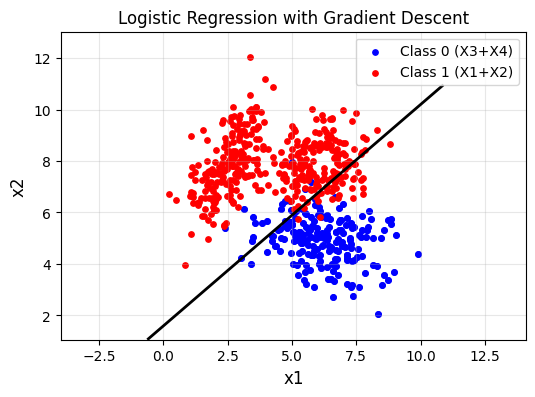

In [96]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/multivariate_data.csv')

X1 = data[['C1_X1', 'C1_X2']].values
X2 = data[['C2_X1', 'C2_X2']].values
X3 = data[['C4_X1', 'C4_X2']].values
X4 = data[['C4_X1', 'C4_X2']].values

X_class1 = np.vstack([X1, X2])
y_class1 = 1 * np.ones([X_class1.shape[0], 1])

X_class0 = np.vstack([X3, X4])
y_class0 = 0 * np.ones([X_class0.shape[0], 1])

X_all = np.vstack([X_class0, X_class1])
y_all = np.vstack([y_class0, y_class1])


X_aug = np.hstack([np.ones((X_all.shape[0], 1)), X_all])


weights = np.zeros((3, 1))


lrate = 0.01
epochs = 10000
n = X_aug.shape[0]


def sigmoid(z):
    return 1 / (1 + np.exp(-z))


for epoch in range(epochs):
    z = np.dot(X_aug, weights)
    y_pred = sigmoid(z)

    error = y_pred - y_all
    gradients = (1/n) * np.dot(X_aug.T, error)

    weights -= lrate * gradients




xp = np.linspace(np.min(X_all[:, 0]) - 1, np.max(X_all[:, 0]) + 1, 100)
yp = np.linspace(np.min(X_all[:, 1]) - 1, np.max(X_all[:, 1]) + 1, 100)
xx, yy = np.meshgrid(xp, yp)
grid = np.c_[xx.ravel(), yy.ravel()]
grid_aug = np.hstack([np.ones((grid.shape[0], 1)), grid])


probs = sigmoid(np.dot(grid_aug, weights)).reshape(xx.shape)

plt.figure(figsize=(6, 4))
plt.scatter(X_class0[:, 0], X_class0[:, 1], c='blue', label='Class 0 (X3+X4)', s=15)
plt.scatter(X_class1[:, 0], X_class1[:, 1], c='red', label='Class 1 (X1+X2)', s=15)


plt.contour(xx, yy, probs, levels=[0.5], colors='black', linewidths=2)

plt.title('Logistic Regression with Gradient Descent')
plt.xlabel('x1', fontsize=12)
plt.ylabel('x2', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.axis('equal')
plt.show()
